In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
! pip install transformers simpletransformers

     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 249 kB 70.8 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 6.6 MB 35.0 MB/s 
     |████████████████████████████████| 596 kB 61.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.2 MB/s 
     |████████████████████████████████| 342 kB 66.3 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 1.8 MB 42.0 MB/s 
     |████████████████████████████████| 10.1 MB 68.4 MB/s 
     |████████████████████████████████| 145 kB 66.5 MB/s 
     |████████████████████████████████| 181 kB 61.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 212 kB 67.7 MB/s 
     |████████████████████████████████| 136 kB 59.5 MB/s 
     |████████████████████████████████| 127 kB 58.1 MB/s 
     |██████████████

In [ ]:
import os
os._exit(00)

In [1]:
%cd drive/MyDrive/CSE4095\ -\ NLP/Delivery-3/

/content/drive/.shortcut-targets-by-id/1FnAGrw_CQ55UcB7YzHg5lCvr8NxMclO5/CSE4095 - NLP/Delivery-3


In [2]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import json
from sklearn.preprocessing import LabelEncoder
import simpletransformers
import os
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from simpletransformers.classification import ClassificationModel
from tqdm import tqdm
import pickle

# Loading Data

In [3]:
def encode_labels(labels):
    le = LabelEncoder()
    y = le.fit_transform(labels)
    return y

In [4]:
dataset = {}
with open('data/dataset.json', encoding='utf-8') as fr:
    dataset = json.load(fr)

labels = {}
with open('data/labels.json', encoding='utf-8') as fr:
    labels = json.load(fr)

splitted_data = {}
with open('data/splitted_data.json', encoding='utf-8') as fr:
    splitted_data = json.load(fr)
X_train, X_test, y_train, y_test = [], [], [], []

for key in ['train', 'test']:
    for i in range(len(splitted_data[f'X_{key}'])):
        exec(f"X_{key}.append(dataset[splitted_data['X_{key}'][i]])")
        exec(f"y_{key}.append(splitted_data['y_{key}'][i])")

y_train = encode_labels(y_train)
y_test = encode_labels(y_test)

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

2022-05-18 18:30:26.852251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [6]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy().decode('utf-8'))
    print()
    print('labels: ', label.numpy())

texts:  hüküm çocuğun cinsel istismarı ve tehdit suçlarından beraat hakaret suçundan mahkumiyet i̇lk derece mahkemesince verilen hükümler temyiz edilmekle başvurunun muhtevası ve inceleme tarihine kadar getirilen kanuni düzenlemeler nazara alınarak dosya tetkik edildi gereği görüşüldü muhakeme safahatını yansıtan tutanaklar belgeler ve gerekçe içeriğine göre yapılan incelemede iddia ve savunma ile tüm delillerin eksiksiz olarak kararda gösterildiği hükmedilen ceza nevi ve miktarı itibarıyla kanuni sınırlar içinde tayin edildiği gibi beraat hükümlerinin de dosya kapsamına uygun olduğu anlaşıldığından sanık müdafisi ve katılan mağdur vekili ile yer cumhuriyet savcısının yerinde görülmeyen temyiz taleplerinin reddiyle hükümlerin onanmasina tarihinde oy birliğiyle karar verildi

labels:  2


2022-05-18 18:30:27.395159: W tensorflow/core/data/root_dataset.cc:200] Optimization loop failed: CANCELLED: Operation was cancelled


# Model Fine-Tuning

In [7]:
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
# model_name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
# model_name = "serdarakyol/interpress-turkish-news-classification"
# model_name = "savasy/bert-base-turkish-sentiment-cased"
model_name = "savasy/bert-turkish-text-classification"

In [8]:
model_args = {
    "use_early_stopping": True,
    "early_stopping_patience": 5,
    "fp16": True,
    "num_train_epochs": 1,
    'overwrite_output_dir': True,
    'learning_rate': 1e-5,
    "save_steps": -1,
    "evaluate_during_training": False,
    "save_model_every_epoch": False,
    "early_stopping_consider_epochs": True,
    "train_batch_size": 64,
    "eval_batch_size": 64
}

In [9]:
model = ClassificationModel(
    "bert",
    model_name,
    use_cuda=True,
    num_labels=12,
    args=model_args,
    ignore_mismatched_sizes=True,
)

Downloading:   0%|          | 0.00/751 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at savasy/bert-turkish-text-classification and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([7, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([7]) in the checkpoint and torch.Size([12]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/245k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [10]:
train_df = pd.DataFrame({"text": X_train, "labels": y_train})
eval_df = pd.DataFrame({"text": X_test, "labels": y_test})

In [12]:
best_score = 0
for epoch in tqdm(range(10)):
    history = model.train_model(train_df)
    result, model_outputs, wrong_predictions = model.eval_model(eval_df)
    if result['mcc'] > best_score:
        with open("./models/transformer_best_checkpoint_turkish_text_classification.h5", 'wb') as f:
            pickle.dump(model, f)
        
        with open('./results/transformer_best_predictions_turkish_text_classification.npy', 'wb') as f:
            np.save(f, np.array(tf.nn.softmax(model_outputs)))

        best_score = result['mcc']

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 10%|█         | 1/10 [05:09<46:24, 309.41s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 20%|██        | 2/10 [10:13<40:50, 306.30s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 30%|███       | 3/10 [15:18<35:40, 305.79s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 40%|████      | 4/10 [20:26<30:38, 306.39s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 50%|█████     | 5/10 [25:30<25:28, 305.61s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 60%|██████    | 6/10 [30:36<20:23, 305.88s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 70%|███████   | 7/10 [35:43<15:18, 306.29s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 80%|████████  | 8/10 [40:49<10:12, 306.13s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

 90%|█████████ | 9/10 [45:55<05:06, 306.18s/it]

  0%|          | 0/22273 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/5569 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

100%|██████████| 10/10 [51:00<00:00, 306.10s/it]


In [ ]:
print('Ayaz')

In [28]:
best_score, result

(0.9083128936083836,
 {'mcc': 0.9066203070817173, 'eval_loss': 0.22657354370775548})

In [29]:
with open("./models/transformer_best_checkpoint_turkish_text_classification.h5", 'rb') as f:
    model = pickle.load(f)
        
with open('./results/transformer_best_predictions_turkish_text_classification.npy', 'rb') as f:
    model_outputs = np.load(f)

In [30]:
y_pred = np.argmax(model_outputs, axis=1)

In [31]:
classes = ['Aldatmaya-Yönelik-Suç', 'Cana-Kastetme-Suçu', 'Cinsel-Saldırı-Suçu',
           'Hakaret', 'Kanuna/Yasaya-Muhalefet-Olma', 'Other', 'Tehdit', 'Trafik-Suçu',
           'Uyuşturucu-Madde-Suçu', 'Yaralama', 'undefined', 'İzinsiz-Mal-Alma-Suçu']

In [32]:
cr = classification_report(y_test, y_pred, target_names=classes)
print(cr)

                              precision    recall  f1-score   support

       Aldatmaya-Yönelik-Suç       0.94      0.95      0.95       237
          Cana-Kastetme-Suçu       0.90      0.94      0.92        64
         Cinsel-Saldırı-Suçu       0.97      0.93      0.95       148
                     Hakaret       0.70      0.66      0.68       118
Kanuna/Yasaya-Muhalefet-Olma       0.89      0.92      0.90       352
                       Other       0.83      0.76      0.80       493
                      Tehdit       0.72      0.78      0.75       359
                 Trafik-Suçu       1.00      0.90      0.95        41
       Uyuşturucu-Madde-Suçu       0.98      1.00      0.99       232
                    Yaralama       0.94      0.89      0.91       546
                   undefined       1.00      1.00      1.00      2589
       İzinsiz-Mal-Alma-Suçu       0.86      0.95      0.90       390

                    accuracy                           0.93      5569
                  

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

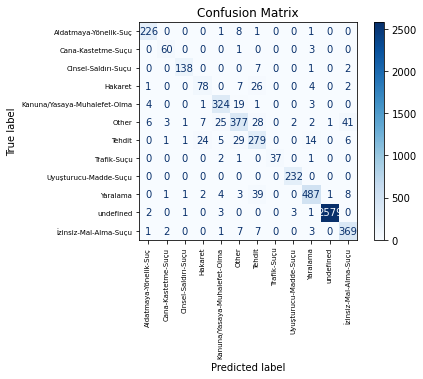

In [37]:
disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=classes,
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title('Confusion Matrix')

plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('results/transformer_text_classification_cm.png', dpi=300, bbox_inches='tight')